# Movie Recommendation System using Content-Based Filtering

### Objective:
The objective is to recommend movies similar to a user-provided movie title using content-based filtering. Content-based filtering recommends items based on their attributes and the similarity of those attributes to the input.

### Data Source:
The dataset is sourced from a CSV file hosted on GitHub, containing information about movies such as title, genre, keywords, overview, cast, crew, director, etc.

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Movies%20Recommendation.csv')

In [ ]:
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [ ]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

In [ ]:
num_rows = df.shape[0]
print(f"The number of rows in the dataset is: {num_rows}")

The number of rows in the dataset is: 4760


### Data Visualization

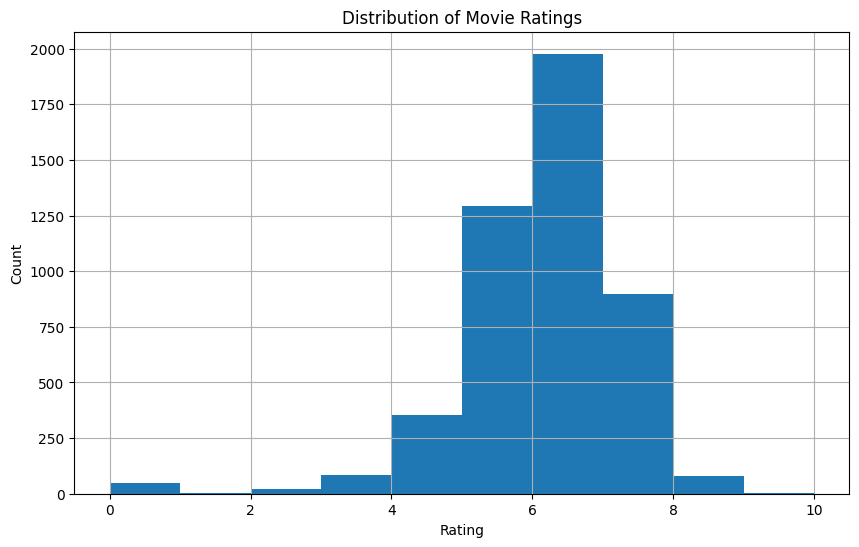

In [ ]:
# Distribution of movie ratings
plt.figure(figsize=(10, 6))
df['Movie_Vote'].hist(bins=10)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

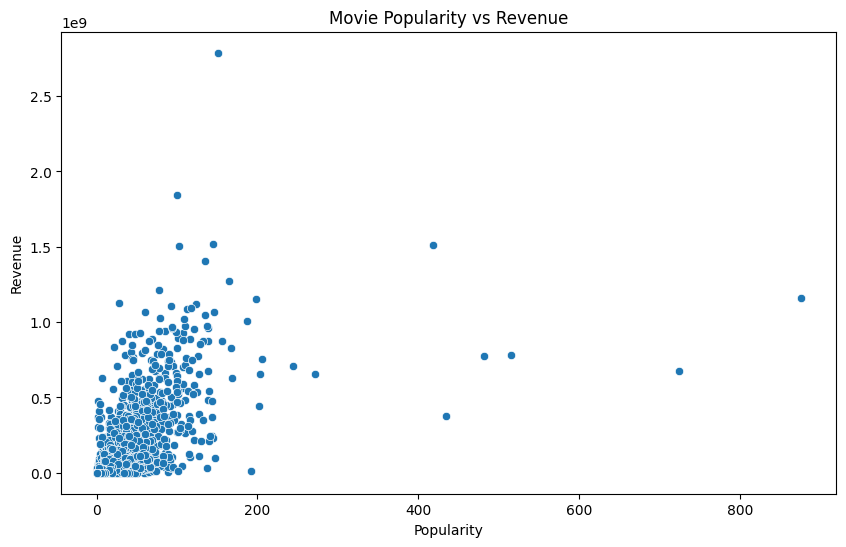

In [ ]:
# Movie popularity vs revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Movie_Popularity', y='Movie_Revenue', data=df)
plt.title('Movie Popularity vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

### Data Preprocessing

In [ ]:
# Check for null values
null_counts = df.isnull().sum()
print(null_counts)

Movie_ID                    0
Movie_Title                 0
Movie_Genre                 0
Movie_Language              0
Movie_Budget                0
Movie_Popularity            0
Movie_Release_Date          0
Movie_Revenue               0
Movie_Runtime               0
Movie_Vote                  0
Movie_Vote_Count            0
Movie_Homepage              0
Movie_Keywords              0
Movie_Overview              0
Movie_Production_House      0
Movie_Production_Country    0
Movie_Spoken_Language       0
Movie_Tagline               0
Movie_Cast                  0
Movie_Crew                  0
Movie_Director              0
dtype: int64


In [ ]:
# Handling missing values
df.fillna('', inplace=True)

In [ ]:
# Feature engineering for content-based filtering
df['combined_features'] = (df['Movie_Genre'] + ' ' + df['Movie_Keywords'] + ' ' +
                               df['Movie_Overview'] + ' ' + df['Movie_Cast'] + ' ' +
                               df['Movie_Crew'] + ' ' + df['Movie_Director'])



In [ ]:
df['combined_features']

0       Crime Comedy hotel new year's eve witch bet ho...
1       Adventure Action Science Fiction android galax...
2       Animation Family father son relationship harbo...
3       Comedy Drama Romance vietnam veteran hippie me...
4       Drama male nudity female nudity adultery midli...
                              ...                        
4755    Horror  A Broadway producer puts on a play wit...
4756    Comedy Family Drama  In 1979, an Indian family...
4757    Thriller Drama christian film sex trafficking ...
4758    Family  After being estranged since her mother...
4759    Documentary music actors legendary perfomer cl...
Name: combined_features, Length: 4760, dtype: object

### Modelling and Recommmendation Generation

Find the TF-IDF Matrix

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

In [ ]:
print(tfidf_matrix)

  (0, 36582)	0.0334308741876559
  (0, 172376)	0.0334308741876559
  (0, 229328)	0.01910161326609836
  (0, 228111)	0.018844678330525274
  (0, 231236)	0.0334308741876559
  (0, 205693)	0.016308914194969996
  (0, 36581)	0.0334308741876559
  (0, 172367)	0.0334308741876559
  (0, 198685)	0.010938070643492417
  (0, 200211)	0.02994002856041956
  (0, 193148)	0.0073014035644544525
  (0, 36573)	0.0334308741876559
  (0, 172339)	0.0334308741876559
  (0, 181520)	0.014901428733730944
  (0, 202758)	0.027700703816050973
  (0, 193307)	0.014631724362197712
  (0, 36572)	0.0334308741876559
  (0, 172336)	0.0334308741876559
  (0, 199493)	0.010896716015971185
  (0, 226413)	0.011064898143786538
  (0, 36571)	0.0334308741876559
  (0, 172335)	0.0334308741876559
  (0, 196239)	0.015113136399389826
  (0, 193559)	0.0334308741876559
  (0, 211942)	0.023808460158066026
  :	:
  (4758, 185312)	0.1405294057543569
  (4758, 193259)	0.11648336502447504
  (4759, 5235)	0.2963751032864321
  (4759, 166400)	0.2963751032864321
  (475

Calculating the Cosine Similarity

In [ ]:
# Calculating cosine similarity between the TF-IDF vectors
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
print(cosine_sim)

[[1.         0.4053132  0.60341734 ... 0.10010631 0.         0.06002014]
 [0.4053132  1.         0.41105093 ... 0.06714527 0.01608174 0.0386734 ]
 [0.60341734 0.41105093 1.         ... 0.09547485 0.00817895 0.05950236]
 ...
 [0.10010631 0.06714527 0.09547485 ... 1.         0.02521689 0.01077183]
 [0.         0.01608174 0.00817895 ... 0.02521689 1.         0.        ]
 [0.06002014 0.0386734  0.05950236 ... 0.01077183 0.         1.        ]]


In [ ]:
cosine_sim.shape

(4760, 4760)

### Prediction

Finding the movie based on the closest spelling

In [ ]:
# User input for movie title
user_movie_title = input("Enter a movie title: ")

Enter a movie title: finding n


In [ ]:
All_movies_title_list = df['Movie_Title'].tolist()

In [ ]:
import difflib

In [ ]:
movie_recomm = difflib.get_close_matches(user_movie_title, All_movies_title_list)
print(movie_recomm)

['Finding Nemo', 'Riding Giants', 'Finding Neverland']


In [ ]:
Close_match = movie_recomm[0]
print(Close_match)

Finding Nemo


In [ ]:
Index_of_Close_match_movie = df[df.Movie_Title == Close_match]['Movie_ID'].values[0]
print(Index_of_Close_match_movie)

3


Calculating the Recommendation Score

In [ ]:
Recommendation_Score = list(enumerate(cosine_sim[Index_of_Close_match_movie]))
print(Recommendation_Score)

[(0, 0.661702451013138), (1, 0.42742467796511713), (2, 0.6569290170970105), (3, 1.0000000000000004), (4, 0.7158772131949632), (5, 0.5711468411223399), (6, 0.7249315098164222), (7, 0.3676110533341522), (8, 0.3644307951553094), (9, 0.7236804850086528), (10, 0.7411066634414581), (11, 0.246328018563939), (12, 0.5600584392732257), (13, 0.5605241632788984), (14, 0.5554319372081472), (15, 0.4007469372967849), (16, 0.518960920660146), (17, 0.46665310736368104), (18, 0.5399089331742013), (19, 0.3963156312159029), (20, 0.6845401393499657), (21, 0.36454024314684663), (22, 0.491293223559261), (23, 0.6523172008136278), (24, 0.6650326083174929), (25, 0.3896507482425803), (26, 0.6799189631579787), (27, 0.7553459970945555), (28, 0.45286276896332955), (29, 0.31867192432248315), (30, 0.3962623059104277), (31, 0.5447938807904552), (32, 0.34194509558905073), (33, 0.2925971046879764), (34, 0.42146748581147175), (35, 0.5942523803920271), (36, 0.503175992171079), (37, 0.5999063167361407), (38, 0.357366682617

In [ ]:
Sorted_similar_movies = sorted(Recommendation_Score, key=lambda x:x[1], reverse=True)
print(Sorted_similar_movies)

[(3, 1.0000000000000004), (307, 0.7825476245413023), (4091, 0.7624224450482244), (909, 0.7615213680653323), (763, 0.7588934267517529), (1262, 0.7580116672027055), (27, 0.7553459970945555), (189, 0.7551159287650331), (880, 0.7506975156545027), (283, 0.7506860170511992), (3450, 0.7500593222088797), (143, 0.7480901941181436), (1118, 0.7468091887534496), (3982, 0.7465964904932423), (1532, 0.7458567877228818), (247, 0.7448826039234889), (631, 0.744719977336422), (4046, 0.7441510938923225), (1775, 0.74410414539236), (84, 0.7437955925792988), (731, 0.742665138248685), (1173, 0.742371064055114), (3992, 0.7421445019055324), (744, 0.7417512204495694), (1484, 0.7417030801839724), (10, 0.7411066634414581), (1129, 0.7408079032066761), (614, 0.7398541893570452), (298, 0.7387427349459506), (386, 0.7385158723707965), (135, 0.7376909686002503), (3670, 0.7373310680201347), (1012, 0.7369160005263035), (264, 0.7368412886471263), (299, 0.7367027135905401), (960, 0.7362739499474583), (502, 0.736224554861250

Get Movies based on the Recommendation Score wrt inputed Movie

In [ ]:
num_movies = int(input("Enter the number of movies to recommend:"))
print("\n")

print("Top",num_movies,"movies suggested for you : \n")

i=1


for movie in Sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['Movie_Title'].values[0]
  if (i<(num_movies+1)):
    print(i, '.',title_from_index)
    i+=1

Enter the number of movies to recommend:10


Top 10 movies suggested for you : 

1 . Forrest Gump
2 . Contact
3 . Jurassic World
4 . The Polar Express
5 . The Chronicles of Riddick
6 . The Core
7 . War of the Worlds
8 . The Day After Tomorrow
9 . The Curious Case of Benjamin Button
10 . A.I. Artificial Intelligence


###Explanation:

* The script starts by reading the dataset and checking for null values.

* It preprocesses the data by filling missing values and creates a combined_features column by concatenating relevant movie attributes.

* Using TF-IDF vectorization and cosine similarity, it calculates how similar each movie is to the user's input movie title.

* User input prompts are incorporated to dynamically interact with the user and generate personalized recommendations.

This structured approach ensures clarity and understanding of each component involved in building a movie recommendation system based on content-based filtering.






